<a href="https://colab.research.google.com/github/ghanaram/data-analyst-project/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration:

In [22]:
import pandas as pd;
df = pd.read_csv('Training_Data_Google_Play_reviews_6000.csv');

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6000 non-null   object
 1   userName              6000 non-null   object
 2   userImage             6000 non-null   object
 3   content               6000 non-null   object
 4   score                 6000 non-null   int64 
 5   thumbsUpCount         6000 non-null   int64 
 6   reviewCreatedVersion  4396 non-null   object
 7   at                    6000 non-null   object
 8   replyContent          191 non-null    object
 9   repliedAt             191 non-null    object
 10  appVersion            4396 non-null   object
 11  userLang              6000 non-null   object
 12  app_id                6000 non-null   object
dtypes: int64(2), object(11)
memory usage: 609.5+ KB
None


In [20]:
print(data.head())

                               reviewId           userName  \
0  495266a4-f451-48c3-a844-fb3c07560d55     Foysal Hossain   
1  947fcd83-7a28-403d-b03b-d0bc20f52e0e          S K VERMA   
2  65856211-67ba-4560-84dd-a0055775ed90      Amanuel Abara   
3  cd5ba250-3a26-43b4-a378-77d18f73a503  Vagarangas X Aopi   
4  e8e886b4-d6c6-416b-b0a1-be90320c4024       Shafin islam   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                      content  score  thumbsUpCount reviewCreatedVersion  \
0  Gett van for no reason 😂😂😂      1              0                  NaN   
1       better' than WhatsApp      4              0                  NaN   
2    That was good app for me      5              0           

In [24]:
print(df.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'userLang', 'app_id'],
      dtype='object')


In [25]:
print(df.isnull().sum())

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1604
at                         0
replyContent            5809
repliedAt               5809
appVersion              1604
userLang                   0
app_id                     0
dtype: int64


In [26]:
df.drop_duplicates(inplace=True)

In [27]:
# Handle missing values (e.g., fill with median, mode, or drop columns/rows)
# For example, to fill missing values in 'reviewCreatedVersion' column with mode
mode_version = df['reviewCreatedVersion'].mode()[0]
df['reviewCreatedVersion'].fillna(mode_version, inplace=True)

In [28]:
# Check the data types of columns
print(df.dtypes)

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
userLang                object
app_id                  object
dtype: object


**Descriptive Analysis:**

In [31]:
# Compute descriptive statistics
import matplotlib.pyplot as plt

print(df.describe())

             score  thumbsUpCount
count  6000.000000    6000.000000
mean      3.297167       6.993667
std       1.778122     232.865931
min       1.000000       0.000000
25%       1.000000       0.000000
50%       4.000000       0.000000
75%       5.000000       0.000000
max       5.000000   14491.000000


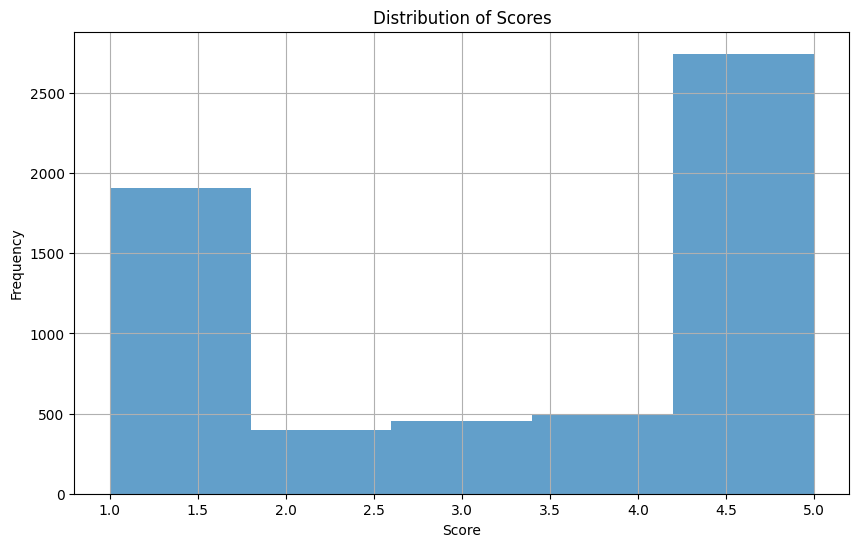

In [32]:
# Visualizations
plt.figure(figsize=(10, 6))
df['score'].hist(bins=5, alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

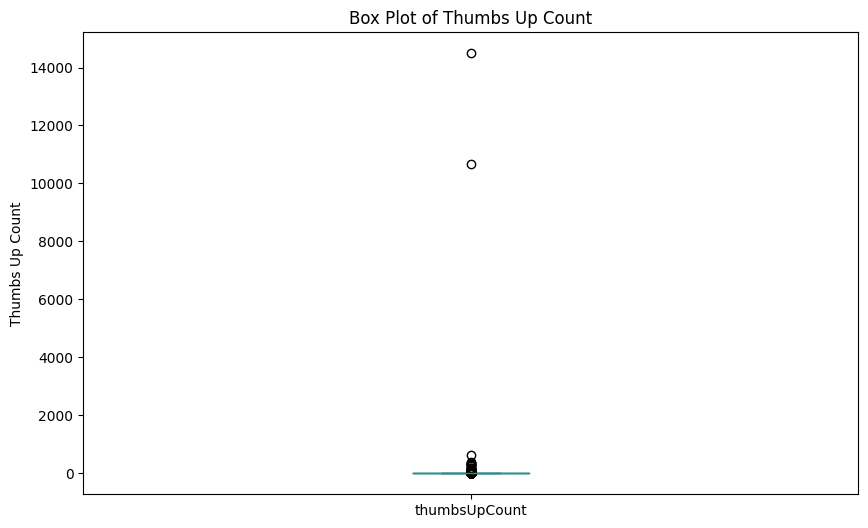

In [33]:
plt.figure(figsize=(10, 6))
df['thumbsUpCount'].plot(kind='box')
plt.ylabel('Thumbs Up Count')
plt.title('Box Plot of Thumbs Up Count')
plt.show()

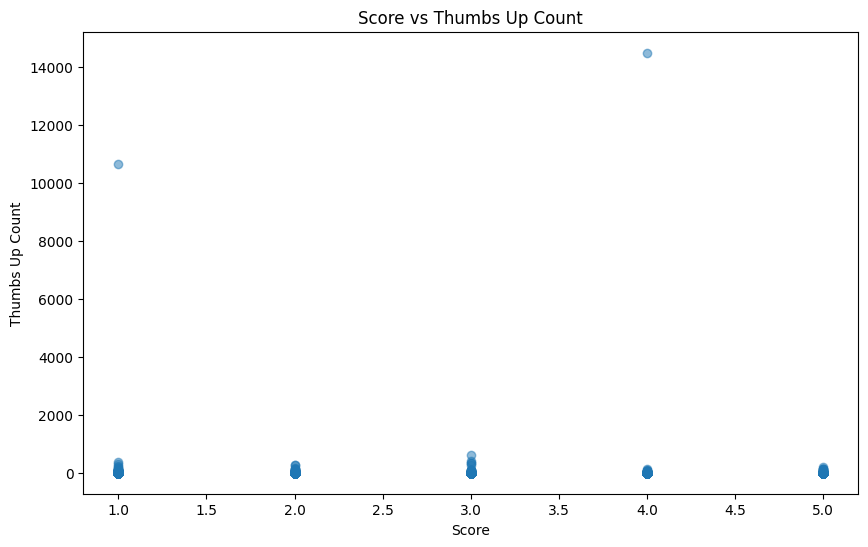

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df['score'], df['thumbsUpCount'], alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.title('Score vs Thumbs Up Count')
plt.show()

In [41]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

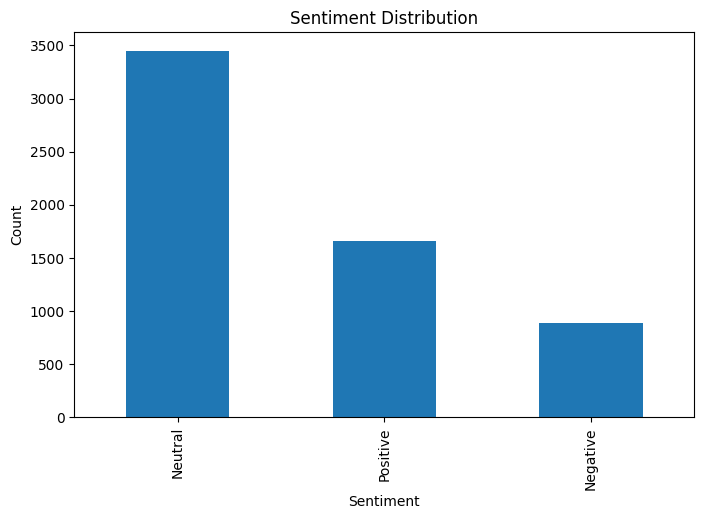

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to 'content' column
df['sentiment_score'] = df['content'].apply(get_sentiment_score)

# Classify sentiment based on score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
df['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()
